In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import chain
import random

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

# Sampling Data

In [2]:
order = pd.read_csv('../../2_data/prepared/order_item_merge.csv')

In [3]:
order['CREATE_DATE'] = pd.to_datetime(order['CREATE_DATE'])
order = order.sort_values('CREATE_DATE', ascending=True)
len(order)

16972

เช็ควันที่นานที่สุดและวันที่ล่าสุด

In [4]:
print(order['CREATE_DATE'].min())
print(order['CREATE_DATE'].max())

2015-10-05 18:39:10
2018-01-20 10:18:07


หาส่วนต่างของช่วงเวลา

In [5]:
time_min = order['CREATE_DATE'].min()
time_max = order['CREATE_DATE'].max()
time_delta = time_max - time_min
time_delta

Timedelta('837 days 15:38:57')

ให้ข้อมูล <span style="color:red">70%</span> ของช่วงเวลานำมาเป็น <span style="color:red">Train set</span>

In [6]:
time_70 = time_delta * 0.7
time_train = time_min + time_70
time_train

Timestamp('2017-05-14 03:12:25.900000')

In [7]:
order_70 =  order[order['CREATE_DATE'] < time_train]
data_percentage = (len(order_70)/len(order))*100 # % of data
print("คิดเป็น %.2f%% ของข้อมูลทั้งหมด" % (data_percentage))

คิดเป็น 55.67% ของข้อมูลทั้งหมด


In [8]:
import numpy as np
matnr = order_70['MATNR']
matnr_train = matnr.tolist()

ให้ข้อมูลของช่วงเวลาที่เหลือ <span style="color:blue">30%</span> เป็น <span style="color:blue">Test set</span>

In [9]:
order_30 =  order[order['CREATE_DATE'] > time_train]
matnr_test = order_30['MATNR'].tolist()
matnr_test[:5]

[25026282, 19062257, 19087908, 19117427, 19035150]

##  Train Model

In [11]:
df_product_id = pd.read_csv('../../5_promissing_models/content-based-filtering/model/data/product_id_md1.csv')
df_product_id.head()

,MATNR,Model,Color,Style,Cat2,Model_id,Color_id,Style_id,Cat2_id
0,19047936,Patisia,White,Vintage,ตู้ข้างเตียง,2886,16,24,61
1,19045101,Cannery,Yellow,Modern,โซฟา 3 ที่นั่ง,719,17,12,203
2,19050282,zNone,Multi-Colour,Vintage,กรอบรูป,8226,10,24,5
3,59000365,Meudon,Black,Contemporary,ชุดห้องนอน,2542,1,5,51
4,59001810,Alicia,White,Modern,ชุดห้องนอน,295,16,12,51


In [46]:
from sklearn.neighbors import NearestNeighbors

def model(matnr):
    try:
        input_item = matnr 
        input_index = df_product_id.index[df_product_id['MATNR'] == input_item].tolist()[0]
        call_frame = df_product_id.loc[(df_product_id.MATNR.isin([input_item])), ['Color_id', 'Style_id', 'Cat2_id']]
        item = call_frame.values
        product = df_product_id.iloc[:,6:9].values
        nbrs = NearestNeighbors(n_neighbors=26).fit(product)
        nbrs_res = nbrs.kneighbors([item[0]])[1]
        nbrs_list = nbrs_res.tolist()[0]
        while input_index in nbrs_list: nbrs_list.remove(input_index)
        result = nbrs_list
        df_result = df_product_id.iloc[result]
        result_matnr = df_result['MATNR']
        list_matnr = result_matnr.tolist()
    except (IndexError, ValueError):
        list_matnr = [0]
    return list_matnr

สร้างตัวแปรใช้ในการเก็บข้อมูล

In [47]:
result_item_0 = []
result_item_1 = []
result_item_2 = []
result_item_3 = []
result_item_4 = []
result_item_5 = []
result_item_6 = []
result_item_7 = []
result_item_8 = []
result_item_9 = []
result_item_10 = []
result_item_11 = []
result_item_12 = []
result_item_13 = []
result_item_14 = []
result_item_15 = []
result_item_16 = []
result_item_17 = []
result_item_18 = []
result_item_19 = []
result_item_20 = []
result_item_21 = []
result_item_22 = []
result_item_23 = []
result_item_24 = []
result_item_25 = []
point_m1_1 = []
precision_md1_1 = []
recall_md1_1 = []
point_m1_2 = []
precision_md1_2 = []
recall_md1_2 = []
point_m1_3 = []
precision_md1_3 = []
recall_md1_3 = []
point_m1_4 = []
precision_md1_4 = []
recall_md1_4 = []
point_m1_5 = []
precision_md1_5 = []
recall_md1_5 = []
point_m1_6 = []
precision_md1_6 = []
recall_md1_6 = []
point_m1_7 = []
precision_md1_7 = []
recall_md1_7 = []
point_m1_8 = []
precision_md1_8 = []
recall_md1_8 = []
point_m1_9 = []
precision_md1_9 = []
recall_md1_9 = []
point_m1_10 = []
precision_md1_10 = []
recall_md1_10 = []
point_m1_11 = []
precision_md1_11 = []
recall_md1_11 = []
point_m1_12 = []
precision_md1_12 = []
recall_md1_12 = []
point_m1_13 = []
precision_md1_13 = []
recall_md1_13 = []
point_m1_14 = []
precision_md1_14 = []
recall_md1_14 = []
point_m1_15 = []
precision_md1_15 = []
recall_md1_15 = []
point_m1_16 = []
precision_md1_16 = []
recall_md1_16 = []
point_m1_17 = []
precision_md1_17 = []
recall_md1_17 = []
point_m1_18 = []
precision_md1_18 = []
recall_md1_18 = []
point_m1_19 = []
precision_md1_19 = []
recall_md1_19 = []
point_m1_20 = []
precision_md1_20 = []
recall_md1_20 = []
point_m1_21 = []
precision_md1_21 = []
recall_md1_21 = []
point_m1_22 = []
precision_md1_22 = []
recall_md1_22 = []
point_m1_23 = []
precision_md1_23 = []
recall_md1_23 = []
point_m1_24 = []
precision_md1_24 = []
recall_md1_24 = []
point_m1_25 = []
precision_md1_25 = []
recall_md1_25 = []

In [48]:
import time
start_time = time.time()

iterate = 30 #จำนวนการทำซ้ำ
for i in range(iterate):
    random_matnr = random.sample(matnr_train, 100) #จำนวนข้อมูลที่จะถูกนำไป Train
    sampling = random_matnr
    for x in sampling:
        res_arr = model(x)
        result_item_0.append(res_arr[:0])
        result_item_1.append(res_arr[:1])
        result_item_2.append(res_arr[:2])
        result_item_3.append(res_arr[:3])
        result_item_4.append(res_arr[:4])
        result_item_5.append(res_arr[:5])
        result_item_6.append(res_arr[:6])
        result_item_7.append(res_arr[:7])
        result_item_8.append(res_arr[:8])
        result_item_9.append(res_arr[:9])
        result_item_10.append(res_arr[:10])
        result_item_11.append(res_arr[:11])
        result_item_12.append(res_arr[:12])
        result_item_13.append(res_arr[:13])
        result_item_14.append(res_arr[:14])
        result_item_15.append(res_arr[:15])
        result_item_16.append(res_arr[:16])
        result_item_17.append(res_arr[:17])
        result_item_18.append(res_arr[:18])
        result_item_19.append(res_arr[:19])
        result_item_20.append(res_arr[:20])
        result_item_21.append(res_arr[:21])
        result_item_22.append(res_arr[:22])
        result_item_23.append(res_arr[:23])
        result_item_24.append(res_arr[:24])
        result_item_25.append(res_arr[:25])
    flatten_result_train_0 = list(chain.from_iterable(result_item_0))
    flatten_result_train_1 = list(chain.from_iterable(result_item_1))
    flatten_result_train_2 = list(chain.from_iterable(result_item_2))
    flatten_result_train_3 = list(chain.from_iterable(result_item_3))
    flatten_result_train_4 = list(chain.from_iterable(result_item_4))
    flatten_result_train_5 = list(chain.from_iterable(result_item_5))
    flatten_result_train_6 = list(chain.from_iterable(result_item_6))
    flatten_result_train_7 = list(chain.from_iterable(result_item_7))
    flatten_result_train_8 = list(chain.from_iterable(result_item_8))
    flatten_result_train_9 = list(chain.from_iterable(result_item_9))
    flatten_result_train_10 = list(chain.from_iterable(result_item_10))
    flatten_result_train_11 = list(chain.from_iterable(result_item_11))
    flatten_result_train_12 = list(chain.from_iterable(result_item_12))
    flatten_result_train_13 = list(chain.from_iterable(result_item_13))
    flatten_result_train_14 = list(chain.from_iterable(result_item_14))
    flatten_result_train_15 = list(chain.from_iterable(result_item_15))
    flatten_result_train_16 = list(chain.from_iterable(result_item_16))
    flatten_result_train_17 = list(chain.from_iterable(result_item_17))
    flatten_result_train_18 = list(chain.from_iterable(result_item_18))
    flatten_result_train_19 = list(chain.from_iterable(result_item_19))
    flatten_result_train_20 = list(chain.from_iterable(result_item_20))
    flatten_result_train_21 = list(chain.from_iterable(result_item_21))
    flatten_result_train_22 = list(chain.from_iterable(result_item_22))
    flatten_result_train_23 = list(chain.from_iterable(result_item_23))
    flatten_result_train_24 = list(chain.from_iterable(result_item_24))
    flatten_result_train_25 = list(chain.from_iterable(result_item_25))
    for x in matnr_test:
        if x in flatten_result_train_1:
            point_m1_1.append(1)
        elif x not in flatten_result_train_1:
            point_m1_1.append(0)
    for x in flatten_result_train_1:
        if x not in matnr_test:
            point_m1_1.append(2)
    precision_1 = (point_m1_1.count(1) / (point_m1_1.count(1) + point_m1_1.count(0)))
    recall_1 = (point_m1_1.count(1) / (point_m1_1.count(1) + point_m1_1.count(2)))
    precision_md1_1.append(precision_1)
    recall_md1_1.append(recall_1)

    for x in matnr_test:
        if x in flatten_result_train_2:
            point_m1_2.append(1)
        elif x not in flatten_result_train_2:
            point_m1_2.append(0)
    for x in flatten_result_train_2:
        if x not in matnr_test:
            point_m1_2.append(2)
    precision_2 = (point_m1_2.count(1) / (point_m1_2.count(1) + point_m1_2.count(0)))
    recall_2 = (point_m1_2.count(1) / (point_m1_2.count(1) + point_m1_2.count(2)))
    precision_md1_2.append(precision_2)
    recall_md1_2.append(recall_2)
    
    for x in matnr_test:
        if x in flatten_result_train_3:
            point_m1_3.append(1)
        elif x not in flatten_result_train_3:
            point_m1_3.append(0)
    for x in flatten_result_train_3:
        if x not in matnr_test:
            point_m1_3.append(2)
    precision_3 = (point_m1_3.count(1) / (point_m1_3.count(1) + point_m1_3.count(0)))
    recall_3 = (point_m1_3.count(1) / (point_m1_3.count(1) + point_m1_3.count(2)))
    precision_md1_3.append(precision_3)
    recall_md1_3.append(recall_3)

    for x in matnr_test:
        if x in flatten_result_train_4:
            point_m1_4.append(1)
        elif x not in flatten_result_train_4:
            point_m1_4.append(0)
    for x in flatten_result_train_4:
        if x not in matnr_test:
            point_m1_4.append(2)
    precision_4 = (point_m1_4.count(1) / (point_m1_4.count(1) + point_m1_4.count(0)))
    recall_4 = (point_m1_4.count(1) / (point_m1_4.count(1) + point_m1_4.count(2)))
    precision_md1_4.append(precision_4)
    recall_md1_4.append(recall_4)

    for x in matnr_test:
        if x in flatten_result_train_5:
            point_m1_5.append(1)
        elif x not in flatten_result_train_5:
            point_m1_5.append(0)
    for x in flatten_result_train_5:
        if x not in matnr_test:
            point_m1_5.append(2)
    precision_5 = (point_m1_5.count(1) / (point_m1_5.count(1) + point_m1_5.count(0)))
    recall_5 = (point_m1_5.count(1) / (point_m1_5.count(1) + point_m1_5.count(2)))
    precision_md1_5.append(precision_5)
    recall_md1_5.append(recall_5)
    
    for x in matnr_test:
        if x in flatten_result_train_6:
            point_m1_6.append(1)
        elif x not in flatten_result_train_6:
            point_m1_6.append(0)
    for x in flatten_result_train_6:
        if x not in matnr_test:
            point_m1_6.append(2)
    precision_6 = (point_m1_6.count(1) / (point_m1_6.count(1) + point_m1_6.count(0)))
    recall_6 = (point_m1_6.count(1) / (point_m1_6.count(1) + point_m1_6.count(2)))
    precision_md1_6.append(precision_6)
    recall_md1_6.append(recall_6)
    
    for x in matnr_test:
        if x in flatten_result_train_7:
            point_m1_7.append(1)
        elif x not in flatten_result_train_7:
            point_m1_7.append(0)
    for x in flatten_result_train_7:
        if x not in matnr_test:
            point_m1_7.append(2)
    precision_7 = (point_m1_7.count(1) / (point_m1_7.count(1) + point_m1_7.count(0)))
    recall_7 = (point_m1_7.count(1) / (point_m1_7.count(1) + point_m1_7.count(2)))
    precision_md1_7.append(precision_7)
    recall_md1_7.append(recall_7)
    
    for x in matnr_test:
        if x in flatten_result_train_8:
            point_m1_8.append(1)
        elif x not in flatten_result_train_8:
            point_m1_8.append(0)
    for x in flatten_result_train_8:
        if x not in matnr_test:
            point_m1_8.append(2)
    precision_8 = (point_m1_8.count(1) / (point_m1_8.count(1) + point_m1_8.count(0)))
    recall_8 = (point_m1_8.count(1) / (point_m1_8.count(1) + point_m1_8.count(2)))
    precision_md1_8.append(precision_8)
    recall_md1_8.append(recall_8)

    for x in matnr_test:
        if x in flatten_result_train_9:
            point_m1_9.append(1)
        elif x not in flatten_result_train_9:
            point_m1_9.append(0)
    for x in flatten_result_train_9:
        if x not in matnr_test:
            point_m1_9.append(2)
    precision_9 = (point_m1_9.count(1) / (point_m1_9.count(1) + point_m1_9.count(0)))
    recall_9 = (point_m1_9.count(1) / (point_m1_9.count(1) + point_m1_9.count(2)))
    precision_md1_9.append(precision_9)
    recall_md1_9.append(recall_9)

    for x in matnr_test:
        if x in flatten_result_train_10:
            point_m1_10.append(1)
        elif x not in flatten_result_train_10:
            point_m1_10.append(0)
    for x in flatten_result_train_10:
        if x not in matnr_test:
            point_m1_10.append(2)
    precision_10 = (point_m1_10.count(1) / (point_m1_10.count(1) + point_m1_10.count(0)))
    recall_10 = (point_m1_10.count(1) / (point_m1_10.count(1) + point_m1_10.count(2)))
    precision_md1_10.append(precision_10)
    recall_md1_10.append(recall_10)
    
    for x in matnr_test:
        if x in flatten_result_train_11:
            point_m1_11.append(1)
        elif x not in flatten_result_train_11:
            point_m1_11.append(0)
    for x in flatten_result_train_11:
        if x not in matnr_test:
            point_m1_11.append(2)
    precision_11 = (point_m1_11.count(1) / (point_m1_11.count(1) + point_m1_11.count(0)))
    recall_11 = (point_m1_11.count(1) / (point_m1_11.count(1) + point_m1_11.count(2)))
    precision_md1_11.append(precision_11)
    recall_md1_11.append(recall_11)

    for x in matnr_test:
        if x in flatten_result_train_12:
            point_m1_12.append(1)
        elif x not in flatten_result_train_12:
            point_m1_12.append(0)
    for x in flatten_result_train_12:
        if x not in matnr_test:
            point_m1_12.append(2)
    precision_12 = (point_m1_12.count(1) / (point_m1_12.count(1) + point_m1_12.count(0)))
    recall_12 = (point_m1_12.count(1) / (point_m1_12.count(1) + point_m1_12.count(2)))
    precision_md1_12.append(precision_12)
    recall_md1_12.append(recall_12)
    
    for x in matnr_test:
        if x in flatten_result_train_13:
            point_m1_13.append(1)
        elif x not in flatten_result_train_13:
            point_m1_13.append(0)
    for x in flatten_result_train_13:
        if x not in matnr_test:
            point_m1_13.append(2)
    precision_13 = (point_m1_13.count(1) / (point_m1_13.count(1) + point_m1_13.count(0)))
    recall_13 = (point_m1_13.count(1) / (point_m1_13.count(1) + point_m1_13.count(2)))
    precision_md1_13.append(precision_13)
    recall_md1_13.append(recall_13)
    
    for x in matnr_test:
        if x in flatten_result_train_14:
            point_m1_14.append(1)
        elif x not in flatten_result_train_14:
            point_m1_14.append(0)
    for x in flatten_result_train_14:
        if x not in matnr_test:
            point_m1_14.append(2)
    precision_14 = (point_m1_14.count(1) / (point_m1_14.count(1) + point_m1_14.count(0)))
    recall_14 = (point_m1_14.count(1) / (point_m1_14.count(1) + point_m1_14.count(2)))
    precision_md1_14.append(precision_14)
    recall_md1_14.append(recall_14)

    for x in matnr_test:
        if x in flatten_result_train_15:
            point_m1_15.append(1)
        elif x not in flatten_result_train_15:
            point_m1_15.append(0)
    for x in flatten_result_train_15:
        if x not in matnr_test:
            point_m1_15.append(2)
    precision_15 = (point_m1_15.count(1) / (point_m1_15.count(1) + point_m1_15.count(0)))
    recall_15 = (point_m1_15.count(1) / (point_m1_15.count(1) + point_m1_15.count(2)))
    precision_md1_15.append(precision_15)
    recall_md1_15.append(recall_15)

    for x in matnr_test:
        if x in flatten_result_train_16:
            point_m1_16.append(1)
        elif x not in flatten_result_train_16:
            point_m1_16.append(0)
    for x in flatten_result_train_16:
        if x not in matnr_test:
            point_m1_16.append(2)
    precision_16 = (point_m1_16.count(1) / (point_m1_16.count(1) + point_m1_16.count(0)))
    recall_16 = (point_m1_16.count(1) / (point_m1_16.count(1) + point_m1_16.count(2)))
    precision_md1_16.append(precision_16)
    recall_md1_16.append(recall_16)

    for x in matnr_test:
        if x in flatten_result_train_17:
            point_m1_17.append(1)
        elif x not in flatten_result_train_17:
            point_m1_17.append(0)
    for x in flatten_result_train_17:
        if x not in matnr_test:
            point_m1_17.append(2)
    precision_17 = (point_m1_17.count(1) / (point_m1_17.count(1) + point_m1_17.count(0)))
    recall_17 = (point_m1_17.count(1) / (point_m1_17.count(1) + point_m1_17.count(2)))
    precision_md1_17.append(precision_17)
    recall_md1_17.append(recall_17)

    for x in matnr_test:
        if x in flatten_result_train_18:
            point_m1_18.append(1)
        elif x not in flatten_result_train_18:
            point_m1_18.append(0)
    for x in flatten_result_train_18:
        if x not in matnr_test:
            point_m1_18.append(2)
    precision_18 = (point_m1_18.count(1) / (point_m1_18.count(1) + point_m1_18.count(0)))
    recall_18 = (point_m1_18.count(1) / (point_m1_18.count(1) + point_m1_18.count(2)))
    precision_md1_18.append(precision_18)
    recall_md1_18.append(recall_18)

    for x in matnr_test:
        if x in flatten_result_train_19:
            point_m1_19.append(1)
        elif x not in flatten_result_train_19:
            point_m1_19.append(0)
    for x in flatten_result_train_19:
        if x not in matnr_test:
            point_m1_19.append(2)
    precision_19 = (point_m1_19.count(1) / (point_m1_19.count(1) + point_m1_19.count(0)))
    recall_19 = (point_m1_19.count(1) / (point_m1_19.count(1) + point_m1_19.count(2)))
    precision_md1_19.append(precision_19)
    recall_md1_19.append(recall_19)

    for x in matnr_test:
        if x in flatten_result_train_20:
            point_m1_20.append(1)
        elif x not in flatten_result_train_20:
            point_m1_20.append(0)
    for x in flatten_result_train_20:
        if x not in matnr_test:
            point_m1_20.append(2)
    precision_20 = (point_m1_20.count(1) / (point_m1_20.count(1) + point_m1_20.count(0)))
    recall_20 = (point_m1_20.count(1) / (point_m1_20.count(1) + point_m1_20.count(2)))
    precision_md1_20.append(precision_20)
    recall_md1_20.append(recall_20)

    for x in matnr_test:
        if x in flatten_result_train_21:
            point_m1_21.append(1)
        elif x not in flatten_result_train_21:
            point_m1_21.append(0)
    for x in flatten_result_train_21:
        if x not in matnr_test:
            point_m1_21.append(2)
    precision_21 = (point_m1_21.count(1) / (point_m1_21.count(1) + point_m1_21.count(0)))
    recall_21 = (point_m1_21.count(1) / (point_m1_21.count(1) + point_m1_21.count(2)))
    precision_md1_21.append(precision_21)
    recall_md1_21.append(recall_21)

    for x in matnr_test:
        if x in flatten_result_train_22:
            point_m1_22.append(1)
        elif x not in flatten_result_train_22:
            point_m1_22.append(0)
    for x in flatten_result_train_22:
        if x not in matnr_test:
            point_m1_22.append(2)
    precision_22 = (point_m1_22.count(1) / (point_m1_22.count(1) + point_m1_22.count(0)))
    recall_22 = (point_m1_22.count(1) / (point_m1_22.count(1) + point_m1_22.count(2)))
    precision_md1_22.append(precision_22)
    recall_md1_22.append(recall_22)

    for x in matnr_test:
        if x in flatten_result_train_23:
            point_m1_23.append(1)
        elif x not in flatten_result_train_23:
            point_m1_23.append(0)
    for x in flatten_result_train_23:
        if x not in matnr_test:
            point_m1_23.append(2)
    precision_23 = (point_m1_23.count(1) / (point_m1_23.count(1) + point_m1_23.count(0)))
    recall_23 = (point_m1_23.count(1) / (point_m1_23.count(1) + point_m1_23.count(2)))
    precision_md1_23.append(precision_23)
    recall_md1_23.append(recall_23)

    for x in matnr_test:
        if x in flatten_result_train_24:
            point_m1_24.append(1)
        elif x not in flatten_result_train_24:
            point_m1_24.append(0)
    for x in flatten_result_train_24:
        if x not in matnr_test:
            point_m1_24.append(2)
    precision_24 = (point_m1_24.count(1) / (point_m1_24.count(1) + point_m1_24.count(0)))
    recall_24 = (point_m1_24.count(1) / (point_m1_24.count(1) + point_m1_24.count(2)))
    precision_md1_24.append(precision_24)
    recall_md1_24.append(recall_24)

    for x in matnr_test:
        if x in flatten_result_train_25:
            point_m1_25.append(1)
        elif x not in flatten_result_train_25:
            point_m1_25.append(0)
    for x in flatten_result_train_25:
        if x not in matnr_test:
            point_m1_25.append(2)
    precision_25 = (point_m1_25.count(1) / (point_m1_25.count(1) + point_m1_25.count(0)))
    recall_25 = (point_m1_25.count(1) / (point_m1_25.count(1) + point_m1_25.count(2)))
    precision_md1_25.append(precision_25)
    recall_md1_25.append(recall_25)
print("ใช้เวลาทั้งสิ้น %s นาที" % ((time.time() - start_time)/60))

ใช้เวลาทั้งสิ้น 51.080123937129976 นาที


# Evaluate 

<b>Compute <span style="color:red">F1 Score, Precision, Recall</span></b>

In [49]:
start_time = time.time()
precision = []
recall = []
f1_score = []

pre_0 = 0
rec_0 = 0
f1_k0 = 0
precision.append(pre_0)
recall.append(rec_0)
f1_score.append(f1_k0)

pre_1 = np.array(precision_md1_1).mean()
rec_1 = np.array(recall_md1_1).mean()
f1_score_k_1 = 2 * ((pre_1 * rec_1)/(pre_1 + rec_1))
f1_k1 = f1_score_k_1.mean()
precision.append(pre_1)
recall.append(rec_1)
f1_score.append(f1_k1)

pre_2 = np.array(precision_md1_2).mean()
rec_2 = np.array(recall_md1_2).mean()
f1_score_k_2 = 2 * ((pre_2 * rec_2)/(pre_2 + rec_2))
f1_k2 = f1_score_k_2.mean()
precision.append(pre_2)
recall.append(rec_2)
f1_score.append(f1_k2)

pre_3 = np.array(precision_md1_3).mean()
rec_3 = np.array(recall_md1_3).mean()
f1_score_k_3 = 2 * ((pre_3 * rec_3)/(pre_3 + rec_3))
f1_k3 = f1_score_k_3.mean()
precision.append(pre_3)
recall.append(rec_3)
f1_score.append(f1_k3)

pre_4 = np.array(precision_md1_4).mean()
rec_4 = np.array(recall_md1_4).mean()
f1_score_k_4 = 2 * ((pre_4 * rec_4)/(pre_4 + rec_4))
f1_k4 = f1_score_k_4.mean()
precision.append(pre_4)
recall.append(rec_4)
f1_score.append(f1_k4)

pre_5 = np.array(precision_md1_5).mean()
rec_5 = np.array(recall_md1_5).mean()
f1_score_k_5 = 2 * ((pre_5 * rec_5)/(pre_5 + rec_5))
f1_k5 = f1_score_k_5.mean()
precision.append(pre_5)
recall.append(rec_5)
f1_score.append(f1_k5)

pre_6 = np.array(precision_md1_6).mean()
rec_6 = np.array(recall_md1_6).mean()
f1_score_k_6 = 2 * ((pre_6 * rec_6)/(pre_6 + rec_6))
f1_k6 = f1_score_k_6.mean()
precision.append(pre_6)
recall.append(rec_6)
f1_score.append(f1_k6)

pre_7 = np.array(precision_md1_7).mean()
rec_7 = np.array(recall_md1_7).mean()
f1_score_k_7 = 2 * ((pre_7 * rec_7)/(pre_7 + rec_7))
f1_k7 = f1_score_k_7.mean()
precision.append(pre_7)
recall.append(rec_7)
f1_score.append(f1_k7)

pre_8 = np.array(precision_md1_8).mean()
rec_8 = np.array(recall_md1_8).mean()
f1_score_k_8 = 2 * ((pre_8 * rec_8)/(pre_8 + rec_8))
f1_k8 = f1_score_k_8.mean()
precision.append(pre_8)
recall.append(rec_8)
f1_score.append(f1_k8)

pre_9 = np.array(precision_md1_9).mean()
rec_9 = np.array(recall_md1_9).mean()
f1_score_k_9 = 2 * ((pre_9 * rec_9)/(pre_9 + rec_9))
f1_k9 = f1_score_k_9.mean()
precision.append(pre_9)
recall.append(rec_9)
f1_score.append(f1_k9)

pre_10 = np.array(precision_md1_10).mean()
rec_10 = np.array(recall_md1_10).mean()
f1_score_k_10 = 2 * ((pre_10 * rec_10)/(pre_10 + rec_10))
f1_k10 = f1_score_k_10.mean()
precision.append(pre_10)
recall.append(rec_10)
f1_score.append(f1_k10)

pre_11 = np.array(precision_md1_11).mean()
rec_11 = np.array(recall_md1_11).mean()
f1_score_k_11 = 2 * ((pre_11 * rec_11)/(pre_11 + rec_11))
f1_k11 = f1_score_k_11.mean()
precision.append(pre_11)
recall.append(rec_11)
f1_score.append(f1_k11)

pre_12 = np.array(precision_md1_12).mean()
rec_12 = np.array(recall_md1_12).mean()
f1_score_k_12 = 2 * ((pre_12 * rec_12)/(pre_12 + rec_12))
f1_k12 = f1_score_k_12.mean()
precision.append(pre_12)
recall.append(rec_12)
f1_score.append(f1_k12)

pre_13 = np.array(precision_md1_13).mean()
rec_13 = np.array(recall_md1_13).mean()
f1_score_k_13 = 2 * ((pre_13 * rec_13)/(pre_13 + rec_13))
f1_k13 = f1_score_k_13.mean()
precision.append(pre_13)
recall.append(rec_13)
f1_score.append(f1_k13)

pre_14 = np.array(precision_md1_14).mean()
rec_14 = np.array(recall_md1_14).mean()
f1_score_k_14 = 2 * ((pre_14 * rec_14)/(pre_14 + rec_14))
f1_k14 = f1_score_k_14.mean()
precision.append(pre_14)
recall.append(rec_14)
f1_score.append(f1_k14)

pre_15 = np.array(precision_md1_15).mean()
rec_15 = np.array(recall_md1_15).mean()
f1_score_k_15 = 2 * ((pre_15 * rec_15)/(pre_15 + rec_15))
f1_k15 = f1_score_k_15.mean()
precision.append(pre_15)
recall.append(rec_15)
f1_score.append(f1_k15)

pre_16 = np.array(precision_md1_16).mean()
rec_16 = np.array(recall_md1_16).mean()
f1_score_k_16 = 2 * ((pre_16 * rec_16)/(pre_16 + rec_16))
f1_k16 = f1_score_k_16.mean()
precision.append(pre_16)
recall.append(rec_16)
f1_score.append(f1_k16)

pre_17 = np.array(precision_md1_17).mean()
rec_17 = np.array(recall_md1_17).mean()
f1_score_k_17 = 2 * ((pre_17 * rec_17)/(pre_17 + rec_17))
f1_k17 = f1_score_k_17.mean()
precision.append(pre_17)
recall.append(rec_17)
f1_score.append(f1_k17)

pre_18 = np.array(precision_md1_18).mean()
rec_18 = np.array(recall_md1_18).mean()
f1_score_k_18 = 2 * ((pre_18 * rec_18)/(pre_18 + rec_18))
f1_k18 = f1_score_k_18.mean()
precision.append(pre_18)
recall.append(rec_18)
f1_score.append(f1_k18)

pre_19 = np.array(precision_md1_19).mean()
rec_19 = np.array(recall_md1_19).mean()
f1_score_k_19 = 2 * ((pre_19 * rec_19)/(pre_19 + rec_19))
f1_k19 = f1_score_k_19.mean()
precision.append(pre_19)
recall.append(rec_19)
f1_score.append(f1_k19)

pre_20 = np.array(precision_md1_20).mean()
rec_20 = np.array(recall_md1_20).mean()
f1_score_k_20 = 2 * ((pre_20 * rec_20)/(pre_20 + rec_20))
f1_k20 = f1_score_k_20.mean()
precision.append(pre_20)
recall.append(rec_20)
f1_score.append(f1_k20)

pre_21 = np.array(precision_md1_21).mean()
rec_21 = np.array(recall_md1_21).mean()
f1_score_k_21 = 2 * ((pre_21 * rec_21)/(pre_21 + rec_21))
f1_k21 = f1_score_k_21.mean()
precision.append(pre_21)
recall.append(rec_21)
f1_score.append(f1_k21)

pre_22 = np.array(precision_md1_22).mean()
rec_22 = np.array(recall_md1_22).mean()
f1_score_k_22 = 2 * ((pre_22 * rec_22)/(pre_22 + rec_22))
f1_k22 = f1_score_k_22.mean()
precision.append(pre_22)
recall.append(rec_22)
f1_score.append(f1_k22)

pre_23 = np.array(precision_md1_23).mean()
rec_23 = np.array(recall_md1_23).mean()
f1_score_k_23 = 2 * ((pre_23 * rec_23)/(pre_23 + rec_23))
f1_k23 = f1_score_k_23.mean()
precision.append(pre_23)
recall.append(rec_23)
f1_score.append(f1_k23)

pre_24 = np.array(precision_md1_24).mean()
rec_24 = np.array(recall_md1_24).mean()
f1_score_k_24 = 2 * ((pre_24 * rec_24)/(pre_24 + rec_24))
f1_k24 = f1_score_k_24.mean()
precision.append(pre_24)
recall.append(rec_24)
f1_score.append(f1_k24)

pre_25 = np.array(precision_md1_25).mean()
rec_25 = np.array(recall_md1_25).mean()
f1_score_k_25 = 2 * ((pre_25 * rec_25)/(pre_25 + rec_25))
f1_k25 = f1_score_k_25.mean()
precision.append(pre_25)
recall.append(rec_25)
f1_score.append(f1_k25)
print("ใช้เวลาทั้งสิ้น %s วินาที" % (time.time() - start_time))

ใช้เวลาทั้งสิ้น 0.004005908966064453 วินาที


## Plot - Graph

### Plot <span style="color:YellowGreen">Precision</span> 

$$ \text{Precision} = \frac{\text{tp}}{\text{tp} + \text{fp}} $$

โดยกำหนดให้ <br> 
&nbsp;&nbsp;&nbsp;&nbsp; tp = สินค้าที่แนะนำและมีการเลือกชม <br>
&nbsp;&nbsp;&nbsp;&nbsp; fp = สินค้าที่แนะนำแต่ไม่ได้ถูกเลือกชม

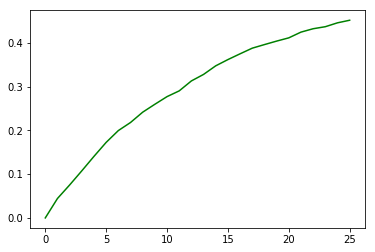

In [50]:
plt.plot(precision, color= 'g')

### Plot <span style="color:Gold">Recall</span>

$$ \text{Recall} = \frac{\text{tp}}{\text{tp} + \text{fn}} $$

โดยกำหนดให้<br>
&nbsp;&nbsp;&nbsp;&nbsp; tp = สินค้าที่แนะนำและมีการเลือกชม<br>
&nbsp;&nbsp;&nbsp;&nbsp; fn = สินค้าที่ถูกเลือกชมแต่ไม่ได้มีการแนะนำ

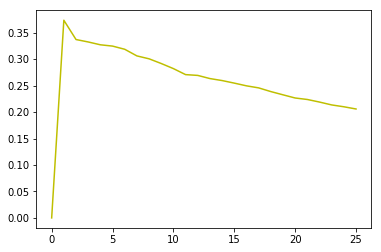

In [51]:
plt.plot(recall, color = 'y')

### Plot <span style="color:red">F1 Score</span>


$$ F1 = \frac{2 \cdot precision\cdot recall}{precision+ recall} $$

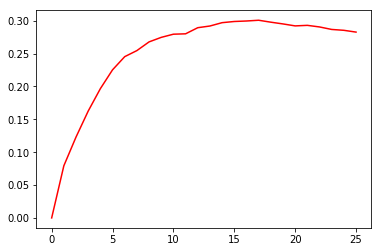

In [52]:
plt.plot(f1_score, color = 'r')

### F1 Score, Precision, Recall 

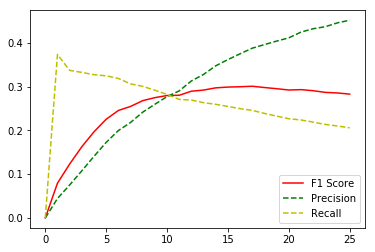

In [53]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(f1_score,c='r',label='F1 Score')
ax.plot(precision,c='g',ls='--',label='Precision')
ax.plot(recall,c='y',ls='--',label='Recall')

plt.legend(loc=4)
plt.show()

around 28-29%

### <b><span style="color:red">Intersection </span> between precision and recall <span style="color:blue">(K)</span></b> 

In [54]:
intersection = np.array(precision) - np.array(recall)
inter_list = intersection.tolist()
inter_list.remove(0)
inter_arr = np.asarray(inter_list)

In [55]:
import numpy as np
def find_nearest(array,value):
    idx = (np.abs(inter_arr-value)).argmin()
    value = inter_arr[idx]
    i = np.where(inter_arr == value)
    for x in chain.from_iterable(i):
        y = x + 1
    return y

print("ที่จุดตัดระหว่าง Precision และ Recall จะได้ค่า K เท่ากับ %s" % find_nearest(intersection, 0))

ที่จุดตัดระหว่าง Precision และ Recall จะได้ค่า K เท่ากับ 10
